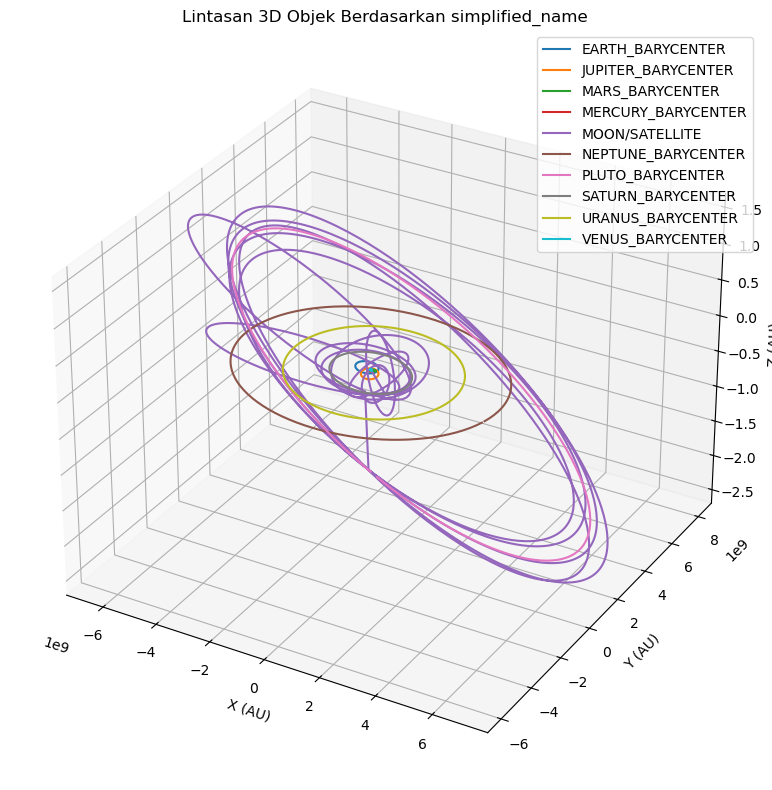

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded from previous steps, but re-loading for completeness)
# df = pd.read_csv('./../dataset/solar_system_positions_with_velocity.csv')
df = pd.read_csv("D:/BACKUP Fathin/ITB/Semester 6/Analisis Data dengan Mesin Pembelajaran/RBL/one_revolution_paths.csv")

# Daftar nama objek seperti dalam notebook
barycenter_planets = [
    '1 MERCURY BARYCENTER', '2 VENUS BARYCENTER', '3 EARTH BARYCENTER',
    '4 MARS BARYCENTER', '5 JUPITER BARYCENTER', '6 SATURN BARYCENTER',
    '7 URANUS BARYCENTER', '8 NEPTUNE BARYCENTER', '9 PLUTO BARYCENTER'
]
moons = [
    '301 MOON', '601 MIMAS', '602 ENCELADUS', '603 TETHYS', '604 DIONE', '605 RHEA',
    '606 TITAN', '607 HYPERION', '608 IAPETUS', '609 PHOEBE', '612 HELENE',
    '613 TELESTO', '614 CALYPSO', '632 METHONE', '634 POLYDEUCES',
    '901 CHARON', '902 NIX', '903 HYDRA', '904 KERBEROS', '905 STYX'
]
sun = '10 SUN'

# Tambahkan kolom simplified_name
df['simplified_name'] = df['name'].copy()
df.loc[df['simplified_name'].isin(moons), 'simplified_name'] = 'MOON/SATELLITE'
df.loc[df['simplified_name'] == sun, 'simplified_name'] = 'SUN'

# Hanya ambil nama-nama yang digunakan
allowed_simplified_names = barycenter_planets + [sun] + moons
df_filtered = df[df['name'].isin(allowed_simplified_names)].copy()

# Lakukan penyederhanaan nama planet
df_filtered['simplified_name'] = df_filtered['simplified_name'].replace({
    '1 MERCURY BARYCENTER': 'MERCURY_BARYCENTER',
    '2 VENUS BARYCENTER': 'VENUS_BARYCENTER',
    '3 EARTH BARYCENTER': 'EARTH_BARYCENTER',
    '4 MARS BARYCENTER': 'MARS_BARYCENTER',
    '5 JUPITER BARYCENTER': 'JUPITER_BARYCENTER',
    '6 SATURN BARYCENTER': 'SATURN_BARYCENTER',
    '7 URANUS BARYCENTER': 'URANUS_BARYCENTER',
    '8 NEPTUNE BARYCENTER': 'NEPTUNE_BARYCENTER',
    '9 PLUTO BARYCENTER': 'PLUTO_BARYCENTER'
})

# Visualisasi 3D berdasarkan simplified_name
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for name, group in df_filtered.groupby('simplified_name'):
    ax.plot(group['x_au'], group['y_au'], group['z_au'], label=name)

ax.set_title('Lintasan 3D Objek Berdasarkan simplified_name')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.legend()
plt.tight_layout()
plt.show()


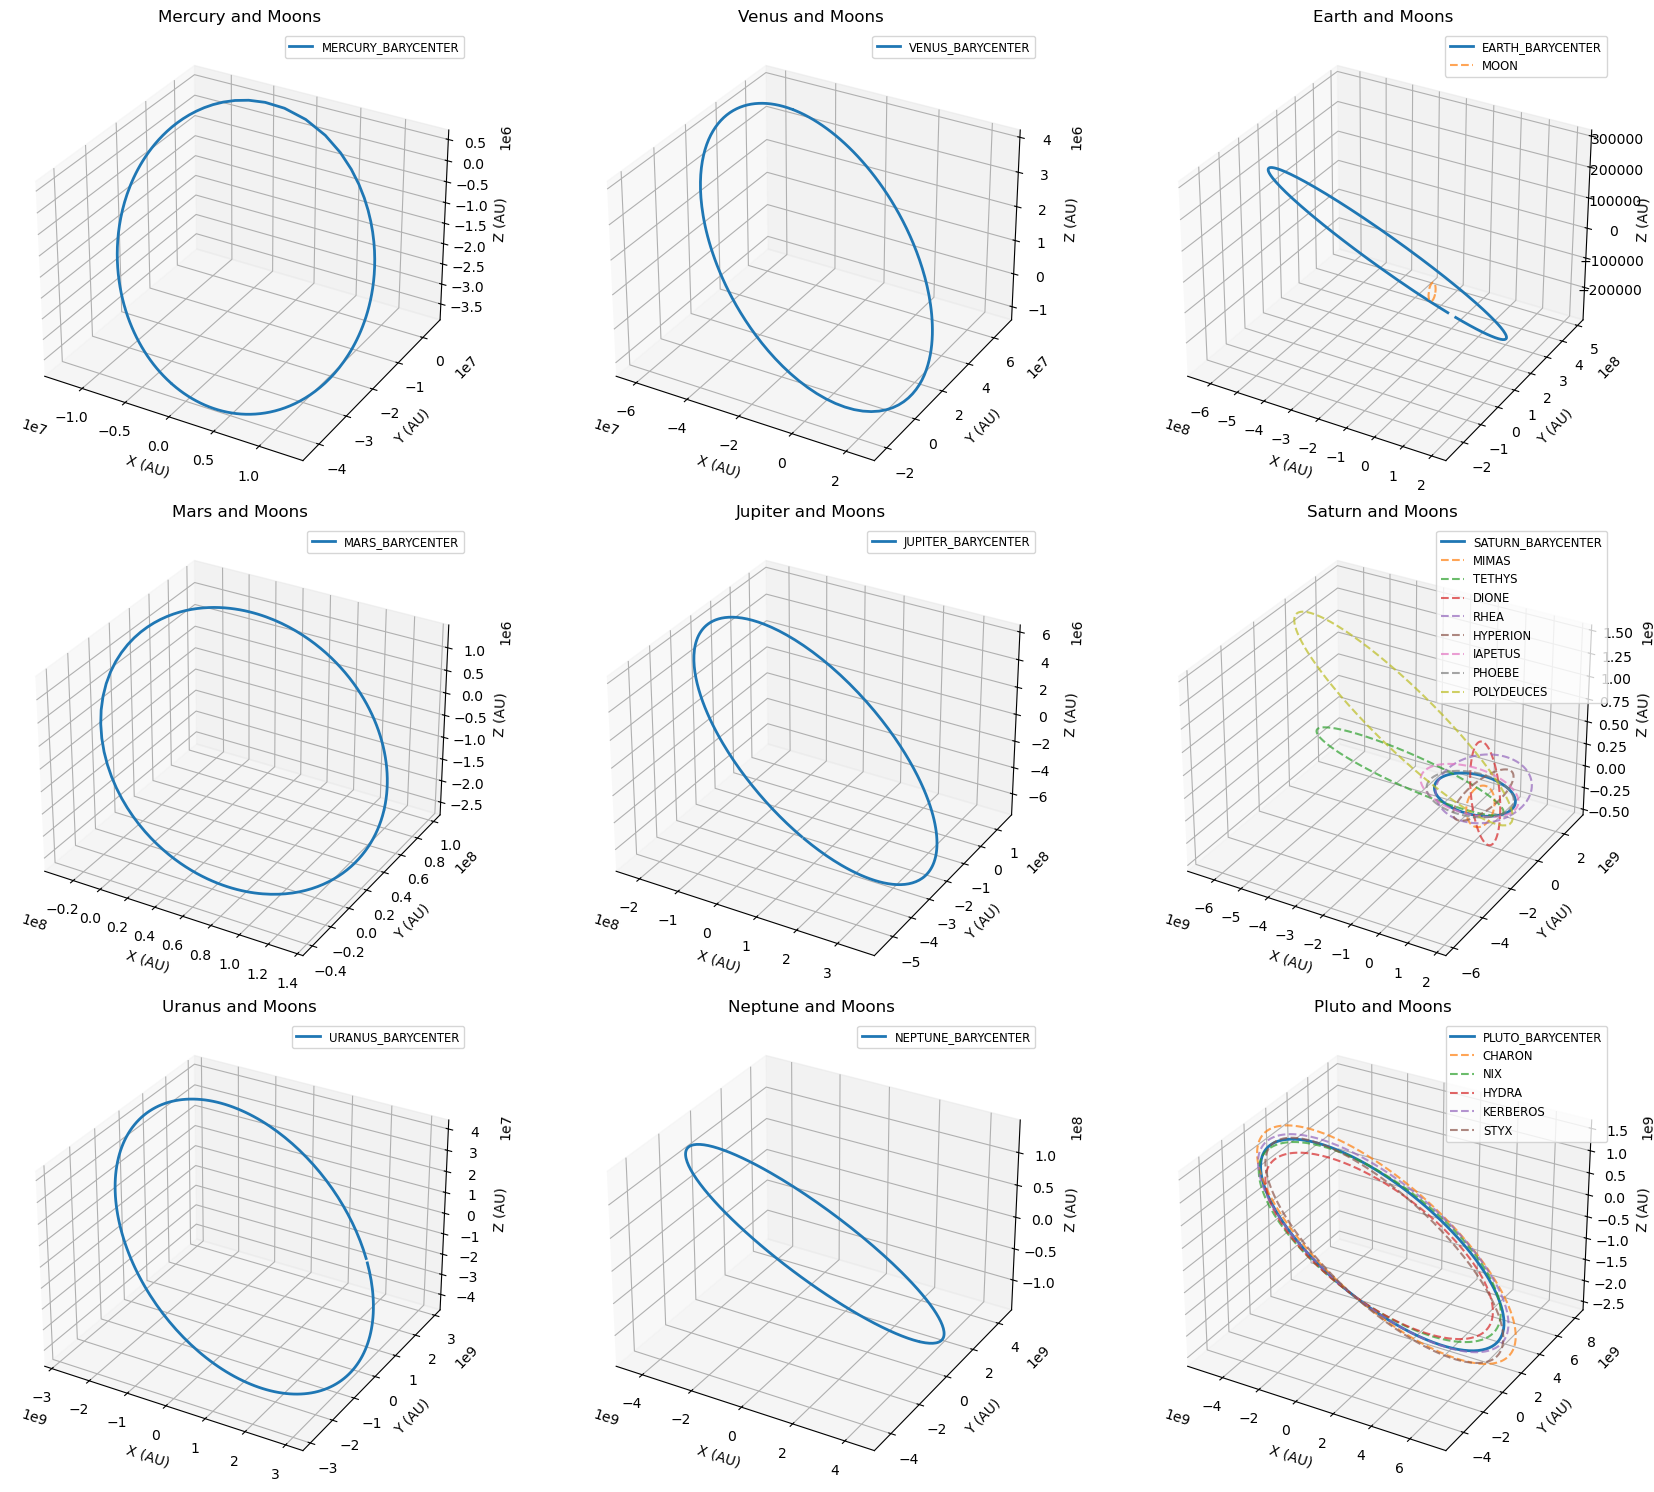

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Mapping ID → Nama Planet
planet_id_map = {
    1: 'MERCURY_BARYCENTER',
    2: 'VENUS_BARYCENTER',
    3: 'EARTH_BARYCENTER',
    4: 'MARS_BARYCENTER',
    5: 'JUPITER_BARYCENTER',
    6: 'SATURN_BARYCENTER',
    7: 'URANUS_BARYCENTER',
    8: 'NEPTUNE_BARYCENTER',
    9: 'PLUTO_BARYCENTER'
}

# Ambil hanya planet yang ada datanya
available_planets = [p for p in planet_id_map.values() if p in df_filtered['simplified_name'].unique()]

# Subset data bulan
moon_data = df_filtered[df_filtered['simplified_name'] == 'MOON/SATELLITE']

# Setup subplot grid
n_planets = len(available_planets)
cols = 3
rows = math.ceil(n_planets / cols)

fig = plt.figure(figsize=(6 * cols, 5 * rows))

for i, planet in enumerate(available_planets, start=1):
    ax = fig.add_subplot(rows, cols, i, projection='3d')
    
    # Plot lintasan planet
    planet_traj = df_filtered[df_filtered['simplified_name'] == planet]
    ax.plot(planet_traj['x_au'], planet_traj['y_au'], planet_traj['z_au'], label=planet, linewidth=2)

    # Cari bulan berdasarkan digit pertama
    planet_digit = list(planet_id_map.keys())[list(planet_id_map.values()).index(planet)]
    moons_for_planet = moon_data[moon_data['name'].str.startswith(f"{planet_digit}")]
    
    # Plot bulan-bulannya
    for moon_name in moons_for_planet['name'].unique():
        moon_traj = moon_data[moon_data['name'] == moon_name]
        moon_label = moon_name.split()[1]
        ax.plot(moon_traj['x_au'], moon_traj['y_au'], moon_traj['z_au'], linestyle='--', label=moon_label, alpha=0.7)
    
    ax.set_title(f'{planet.split("_")[0].title()} and Moons')
    ax.set_xlabel('X (AU)')
    ax.set_ylabel('Y (AU)')
    ax.set_zlabel('Z (AU)')
    ax.legend(fontsize='small')

plt.tight_layout()
plt.show()
